In [1]:
import sys

import catboost as cb

wids_path = "/Users/diana/Documents/projects/widsdatathon2022"
sys.path.append(wids_path)

from global_vars import all_feature_columns, response_column
from utils.visualize import *

pd.set_option("display.max_columns", 500)
sns.set_context("talk")

In [2]:
feature_dict = {
    "base_cat": {
        "cols_to_reduce": [],
        "log10_transform_cols": [],
        "if_one_hot": False,
        "backfill_dict": {},
    },
    "base_onehot": {
        "cols_to_reduce": [],
        "log10_transform_cols": [],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_onehot": {
        "cols_to_reduce": [],
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_temp_pca_onehot": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
    "log_temp_pca_onehot_impute": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {
            "energy_star_rating": ["state_factor", "building_class", "facility_type"]
        },
    },
    "log_temp_pca_cat": {
        "cols_to_reduce": temp_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": False,
        "backfill_dict": {},
    },
    "log_temp_precip_pca_onehot": {
        "cols_to_reduce": temp_col_list + inch_col_list,
        "log10_transform_cols": ["floor_area"],
        "if_one_hot": True,
        "backfill_dict": {},
    },
}

In [8]:
_df

,left_out_year,train_rmse,test_rmse,config
0,1.0,38.325481,58.805376,base_cat
1,2.0,38.205690,46.568473,base_cat
2,3.0,37.813327,50.956010,base_cat
3,4.0,38.493364,41.802237,base_cat
4,5.0,40.081824,48.953598,base_cat
5,6.0,38.885890,51.475629,base_cat
6,0.0,38.497837,NaN,base_cat


In [14]:
rmse_df = pd.DataFrame()
for config_name in feature_dict.keys():
    print(config_name)
    _df = pd.read_csv(f"{wids_path}/validation_result/{config_name}.csv").assign(config=config_name)
    rmse_df = pd.concat([rmse_df, _df], axis=0)
rmse_df = rmse_df.reset_index(drop=True)             

base_cat
base_onehot
log_onehot
log_temp_pca_onehot
log_temp_pca_onehot_impute
log_temp_pca_cat
log_temp_precip_pca_onehot


In [17]:
rmse_df.loc[6, 'method'] = 'whole train'
rmse_df['method'].fillna("loyo", inplace=True)

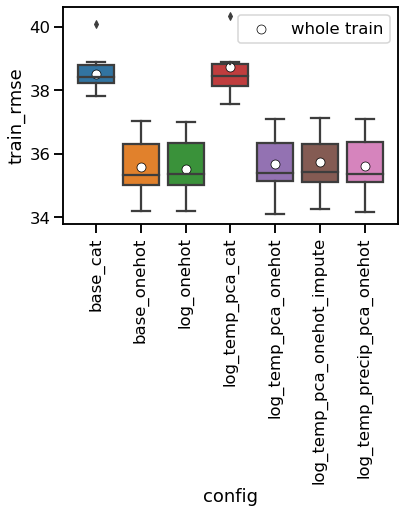

In [38]:
ax = sns.boxplot(data=rmse_df.query("method == 'loyo'").sort_values("config"), 
                 x='config', y='train_rmse')
sns.scatterplot(data=rmse_df.query("method == 'whole train'").sort_values("config"), 
               x='config', y='train_rmse', ax=ax, color='white', edgecolor='k', label='whole train')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

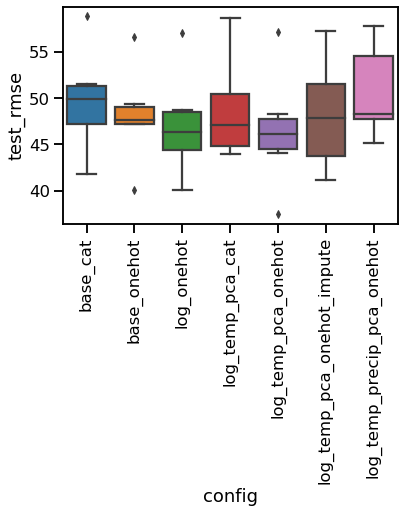

In [23]:
ax = sns.boxplot(data=rmse_df.sort_values("config"), x='config', y='test_rmse')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);